In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly
from plotly import express
import streamlit as st

In [2]:
# Se genera el dataframe del data set
df = pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv')

## PREGUNTA 1
¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 

In [3]:
# Se genera un data frame con la columna de camas de pacientes de covid
point1 = df['state'], df['date'], df['inpatient_beds_used_covid']
df1 = pd.DataFrame(point1)
df1 = pd.DataFrame.transpose(df1)

In [4]:
# Se generan columnas auxiliares para filtrar
df1['date'] = pd.to_datetime(df1['date'])
df1['month'] = pd.DatetimeIndex(df1['date']).month
df1['year'] = pd.DatetimeIndex(df1['date']).year

In [5]:
# Se filtra por el año 2020 y los seis primeros meses 
df_1= df1[df1.month.isin([1,2,3,4,5,6])]
df1 = df_1[df_1['year'] == 2020]

In [6]:
#Se reemplazan valores faltantes
df1.fillna(0)

,state,date,inpatient_beds_used_covid,month,year
52,MS,2020-06-22,634.0,6,2020
53,MA,2020-06-16,1155.0,6,2020
54,MD,2020-06-14,1112.0,6,2020
55,SD,2020-06-13,41.0,6,2020
56,MI,2020-06-04,964.0,6,2020
...,...,...,...,...,...
21584,MT,2020-05-10,16.0,5,2020
21587,FL,2020-03-28,624.0,3,2020
21588,MN,2020-03-03,0.0,3,2020
21590,CO,2020-05-18,426.0,5,2020


In [7]:
#Se cambian valores para su suma
df1['inpatient_beds_used_covid'] = df['inpatient_beds_used_covid'].astype(float, errors = 'raise')


C:\Users\alexh\AppData\Local\Temp\ipykernel_3428\770521140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['inpatient_beds_used_covid'] = df['inpatient_beds_used_covid'].astype(float, errors = 'raise')


In [8]:
# Se genera un data frame con la agrupación de los estados 
five_states = df1.groupby(df1['state']).sum().sort_values('inpatient_beds_used_covid',ascending= False)

In [9]:
#Se resetean índices
five_states.reset_index(inplace=True)

In [10]:
five_states.head(5)


,state,inpatient_beds_used_covid,month,year
0,NY,686528.0,509,220180
1,CA,434721.0,558,256540
2,FL,322227.0,515,224220
3,TX,246237.0,637,367640
4,IL,214010.0,572,270680


In [11]:
# Se visualiza gráficamente 
plotly.express.choropleth(data_frame=five_states , locations= 'state', locationmode= 'USA-states', color = 'inpatient_beds_used_covid', scope = 'usa', color_continuous_scale= 'greys')

## RESPUESTA PUNTO 1

Los 5 estados con  mayor ocupación hospitalaria (tomando en cuenta el criterio de ocupación de cama) por COVID en los 6 primeros meses del 2020 fueron:

-Nueva York

-California

-Florida

-Texas

-Illinois

El rango etario parece no influir mucho en estos primeros meses debido a falta de información.

## PREGUNTA 2
Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

Intervalos de crecimiento y decrecimiento

Puntos críticos (mínimos y máximos)

In [12]:
# Para el punto 2 se toma como parámetro las camas utilizadas por pacientes internos con covid como en el punto anterior.
# El periodo de cuarentena se considera como los 6 primeros meses del año 2020, así como en el punto anterior.
# Se genera el data frame correspondiente. 
point2 = df1['state'], df1['date'],df1['inpatient_beds_used_covid'] 
df2 = pd.DataFrame(point2)
df2 = pd.DataFrame.transpose(df2)

In [13]:
# Se filtra el data frame para generar uno nuecorrespondiente a la ciudad de Nueva York
newyork = df2[df2['state'] == 'NY']

In [14]:
# Se cambia el tipo de las columnas del data frame. 
newyork['inpatient_beds_used_covid'] = newyork['inpatient_beds_used_covid'].astype(float, errors = 'raise')
newyork['date'] = pd.to_datetime(newyork['date'])

C:\Users\alexh\AppData\Local\Temp\ipykernel_3428\2588477516.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\alexh\AppData\Local\Temp\ipykernel_3428\2588477516.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
#Se visualiza el data frame para su análisis posterior
newyork

,state,date,inpatient_beds_used_covid
926,NY,2020-06-15,4476.0
1131,NY,2020-06-09,3001.0
1193,NY,2020-06-07,3720.0
1442,NY,2020-06-06,3989.0
1702,NY,2020-06-11,2772.0
...,...,...,...
21122,NY,2020-06-05,4166.0
21135,NY,2020-03-31,10251.0
21202,NY,2020-05-01,9229.0
21286,NY,2020-03-14,6.0


In [16]:
minimo = newyork.sort_values('inpatient_beds_used_covid').head(1)
maximo = newyork.sort_values('inpatient_beds_used_covid', ascending = False).head(1)

In [17]:
print(minimo)
print(maximo)

      state       date  inpatient_beds_used_covid
21286    NY 2020-03-14                        6.0
      state       date  inpatient_beds_used_covid
21005    NY 2020-04-14                    14126.0


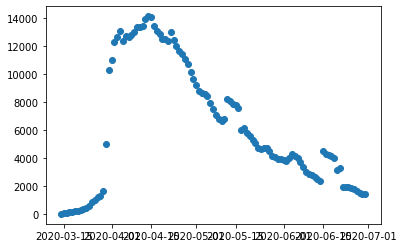

In [18]:
plt.rcParams['figure.figsize'] = (11,5)
plt.plot(newyork['date'], newyork['inpatient_beds_used_covid'],'o')
plt.show()

## RESPUESTA PREGUNTA 2

 El mínimo de ocupación de camas en Nueva York durante la cuarentena establecida (Tomando en cuenta los 6 primeros meses
 del 2020), es de 6 pacientes el día 14-marzo-2020, a partir de esa fecha la ocupación sube hasta un punto máximo el día 14-abr-2020 con 14,126 ocupaciones de cama. Después del punto máximo comienza una disminución progresivo que no precisamente tiene que significar la disminución de casos, solo implica la disminución de camas ocupadas por pacientes COVID. 

## PREGUNTA 3
¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [19]:
#Se generó el dataframe con la columna de utilización de camas para UCI adultos. 
point3 = df['state'], df['date'], df['adult_icu_bed_utilization_numerator']
df3 = pd.DataFrame(point3)
df3 = pd.DataFrame.transpose(df3)

In [20]:
#Se genera columna auxiliar para filtrar por año
df3['date'] = pd.to_datetime(df3['date'])
df3['year'] = pd.DatetimeIndex(df3['date']).year

In [21]:
#Se reemplazan las columnas vacias con 0
df3.fillna(0)

,state,date,adult_icu_bed_utilization_numerator,year
0,PR,2020-12-23,483.0,2020
1,OR,2020-12-22,518.0,2020
2,VI,2020-10-16,11.0,2020
3,VI,2020-10-15,10.0,2020
4,PR,2020-10-14,470.0,2020
...,...,...,...,...
47796,AS,2022-02-17,4.0,2022
47797,CA,2022-02-05,6060.0,2022
47798,NM,2022-02-20,378.0,2022
47799,ND,2022-02-03,142.0,2022


In [22]:
#Se cambia el tipo de columna
df3['adult_icu_bed_utilization_numerator'] = df3['adult_icu_bed_utilization_numerator'].astype(float, errors = 'raise')

In [23]:
#Se filtra por año
states_2020 = df3[df3['year'] == 2020]

In [24]:
#Se retira la columna año para mejor visualización
states_2020 = states_2020.drop(columns='year')

In [25]:
#Se agrupan los estados, se suman los valores de la utilización de camas por estado y se ordenan de mayor a menor 
states_2020 = states_2020.groupby('state').sum().sort_values('adult_icu_bed_utilization_numerator', ascending= False)

In [26]:
#Se reindexa para una mejor visualización
states_2020.reset_index(inplace= True)

In [27]:
#Se visualizan los 5 estados con mayor ocupación de camas de UCI
states_2020.head(5)

,state,adult_icu_bed_utilization_numerator
0,TX,984723.0
1,CA,900385.0
2,FL,798553.0
3,NY,483952.0
4,OH,451660.0


In [28]:
#Se visualiza gráficamente la utilización de camas de la Unidad de Cuidados Intensivos por estado correspondientes al año 2020
plotly.express.choropleth(data_frame=states_2020 , locations= 'state', locationmode= 'USA-states', color = 'adult_icu_bed_utilization_numerator', scope = 'usa', color_continuous_scale= 'OrRd')

## Respuesta punto 3

Los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020 fueron:

-Texas

-California

-Florida

-Nueva York

-Ohio

## PREGUNTA 4
¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [29]:
#Se toma en cuenta la columna total de pacientes pedriaticos con covid confirmado
point4 = df['state'], df['date'], df['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid']
df4 = pd.DataFrame(point4)
df4 = pd.DataFrame.transpose(df4)

In [30]:
#Se genera columna auxiliar para filtrar por año
df4['date'] = pd.to_datetime(df4['date'])
df4['year'] = pd.DatetimeIndex(df4['date']).year

In [31]:
# Se rellenan valores faltantes
df4.fillna(0)

,state,date,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,year
0,PR,2020-12-23,23.0,2020
1,OR,2020-12-22,7.0,2020
2,VI,2020-10-16,0.0,2020
3,VI,2020-10-15,0.0,2020
4,PR,2020-10-14,35.0,2020
...,...,...,...,...
47796,AS,2022-02-17,0.0,2022
47797,CA,2022-02-05,399.0,2022
47798,NM,2022-02-20,8.0,2022
47799,ND,2022-02-03,13.0,2022


In [32]:
#Se cambia el tipo de valor para su suma
df4['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'] = df4['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'].astype(float, errors = 'raise')

In [33]:
# Se filtra por el año 2020
pedriatic_2020 = df4[df4['year'] == 2020]

In [34]:
#Eliminamos columna auxiliar año para una mejor visualización
pedriatic_2020 = pedriatic_2020.drop(columns='year')

In [35]:
#Se agrupa por estado y se reindexa
pedriatic_2020 = pedriatic_2020.groupby('state').sum()
pedriatic_2020.reset_index(inplace=True)

## RESPUESTA PUNTO 4
La cantidad de camas se utilizaron por Estado para pacientes pediátricos con COVID durante el 2020 es la del siguiente cuadro:


In [36]:
pedriatic_2020

,state,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid
0,AK,476.0
1,AL,4299.0
2,AR,4089.0
3,AZ,7260.0
4,CA,15085.0
5,CO,5386.0
6,CT,1197.0
7,DC,2961.0
8,DE,743.0
9,FL,46244.0


In [37]:
#Se visualiza gráficamente
plotly.express.choropleth(data_frame=pedriatic_2020 , locations= 'state', locationmode= 'USA-states', color = 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid', scope = 'usa', color_continuous_scale= 'Greens')

## PREGUNTA 5
¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

In [38]:
#Para este punto se considera los datos históricos, se toma en cuenta la ocupación de camas de la UCI contra
# la ocupación de camas de UCI  con COVID confirmado.
point5 = df['state'], df['staffed_adult_icu_bed_occupancy'], df['staffed_icu_adult_patients_confirmed_and_suspected_covid']
df5 = pd.DataFrame(point5)
df5 = pd.DataFrame.transpose(df5)
df5.fillna(0)

,state,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_and_suspected_covid
0,PR,483.0,87.0
1,OR,518.0,123.0
2,VI,11.0,1.0
3,VI,10.0,1.0
4,PR,470.0,51.0
...,...,...,...
47796,AS,4.0,0.0
47797,CA,6060.0,2090.0
47798,NM,378.0,102.0
47799,ND,142.0,53.0


In [39]:
# Se cambia el tipo objeto
df5['staffed_adult_icu_bed_occupancy'] = df5['staffed_adult_icu_bed_occupancy'].astype(float, errors = 'raise')
df5['staffed_icu_adult_patients_confirmed_and_suspected_covid'] = df5['staffed_icu_adult_patients_confirmed_and_suspected_covid'].astype(float, errors = 'raise')

In [40]:
# Se agrupa por estado y se genera la columna donde se encontrará el porcentaje de
# Camas utilizadas de la UCI contra camas utilizadas de la UCI por COVID
icuvscovid = df5.groupby('state').sum()
icuvscovid.reset_index(inplace=True)
icuvscovid['Porcentaje'] = (icuvscovid['staffed_icu_adult_patients_confirmed_and_suspected_covid']*100) / icuvscovid['staffed_adult_icu_bed_occupancy'] 

## RESPUESTA PUNTO 5
La siguiente tabla muestra la relación del porcentaje 

In [41]:
#Se vizualiza la tabla de porcentaje histórico por estado
icuvscovid

,state,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_and_suspected_covid,Porcentaje
0,AK,71124.0,11858.0,16.672291
1,AL,1004211.0,229616.0,22.865314
2,AR,545294.0,147677.0,27.082088
3,AS,1328.0,2.0,0.150602
4,AZ,916227.0,256474.0,27.992408
5,CA,4022794.0,930332.0,23.126514
6,CO,654339.0,152505.0,23.306726
7,CT,439002.0,63149.0,14.384673
8,DC,195606.0,24170.0,12.356472
9,DE,108823.0,17700.0,16.264944


## PREGUNTA 6
¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [42]:
# Se tomna en cuenta la columnas muertes covid para el datarframe 
point6 = df['state'], df['date'], df['deaths_covid']
df6 = pd.DataFrame(point6)
df6 = pd.DataFrame.transpose(df6)

In [43]:
#Se genera columna auxiliar para filtrar por año
df6['date'] = pd.to_datetime(df6['date'])
df6['year'] = pd.DatetimeIndex(df6['date']).year

In [44]:
#Se reemplazan celdas vacias con 0
df6.fillna(0)

,state,date,deaths_covid,year
0,PR,2020-12-23,59.0,2020
1,OR,2020-12-22,10.0,2020
2,VI,2020-10-16,0.0,2020
3,VI,2020-10-15,0.0,2020
4,PR,2020-10-14,6.0,2020
...,...,...,...,...
47796,AS,2022-02-17,0.0,2022
47797,CA,2022-02-05,57.0,2022
47798,NM,2022-02-20,2.0,2022
47799,ND,2022-02-03,2.0,2022


In [45]:
#Se cambia la columna typo objeto por entero
df6['deaths_covid'] = df6['deaths_covid'].astype(float, errors = 'raise')

In [46]:
#Se filtra el dataframe por el año 2021
deaths_2021 = df6[df6['year'] == 2021]

In [47]:
#Se elimina la columna auxilar para una mejor visualización
deaths_2021 = deaths_2021.drop(columns= 'year')

## RESPUESTA PREGUNTA 6
Las muertes por covid ,según el Estado, durante el año 2021 están representadas de la siguiente manera. 

In [48]:
#Se agrupa por estado y se reindexa el dataframe
deaths_2021 = deaths_2021.groupby('state').sum()
deaths_2021.reset_index(inplace = True)

In [49]:
#Se vizualiza la tabla 
deaths_2021

,state,deaths_covid
0,AK,614.0
1,AL,6390.0
2,AR,3582.0
3,AS,0.0
4,AZ,16250.0
5,CA,35108.0
6,CO,2835.0
7,CT,2725.0
8,DC,532.0
9,DE,562.0


In [50]:
#Se visualiza gráficamente 
plotly.express.choropleth(data_frame=deaths_2021 , locations= 'state', locationmode= 'USA-states', color = 'deaths_covid', scope = 'usa', color_continuous_scale= 'YlOrRd')

## PREGUNTA 7

In [51]:
#Se toma en cuenta la columna de falta de personal por día 
point7 = df['state'], df['date'], df['critical_staffing_shortage_today_yes']
df7 = pd.DataFrame(point7)
df7 = pd.DataFrame.transpose(df7)

In [52]:
#Se genera columna auxiliar para filtrar por año
df7['date'] = pd.to_datetime(df7['date'])
df7['year'] = pd.DatetimeIndex(df7['date']).year

In [53]:
#Se reemplazan valores faltantes por 0
df7.fillna(0)

,state,date,critical_staffing_shortage_today_yes,year
0,PR,2020-12-23,11,2020
1,OR,2020-12-22,5,2020
2,VI,2020-10-16,1,2020
3,VI,2020-10-15,1,2020
4,PR,2020-10-14,9,2020
...,...,...,...,...
47796,AS,2022-02-17,0,2022
47797,CA,2022-02-05,14,2022
47798,NM,2022-02-20,2,2022
47799,ND,2022-02-03,0,2022


In [54]:
#Se cambia la columna typo objeto por entero
df7['critical_staffing_shortage_today_yes'] = df7['critical_staffing_shortage_today_yes'].astype(float, errors = 'raise')

In [55]:
#Se filtra el dataframe por el año 2021
staff_shortage_2021 = df7[df7['year'] == 2021]

In [56]:
#Se elimina la columna auxilar para una mejor visualización
staff_shortage_2021 = staff_shortage_2021.drop(columns= 'year')

In [57]:
# Se agrupa por estado
staff_shortage_2021 = staff_shortage_2021.groupby('state').sum()

In [58]:
# Se reindexa el data frame
staff_shortage_2021.reset_index(inplace = True)

In [59]:
#Se genera un nuevo dataframe para visualizar la relación de falta de personal contra las muertes en el 2021
muertes_staff = pd.merge(deaths_2021,staff_shortage_2021, on = 'state', how = 'inner')

## RESPUESTA PUNTO 7

La relaación de falta de personal respecto a las muertes se ve representada en la siguiente tabla y gráfica. En la gráfica podemos observar que el comportamiento de las muertes y de la falta de personal es muy similar. Con esto podemos asumir que la falta de personal pudo haber influido en los decesos de las personas. Es necesario tomar medidas para poder minimizar la pérdida de las vidas. 

In [60]:
muertes_staff

,state,deaths_covid,critical_staffing_shortage_today_yes
0,AK,614.0,843.0
1,AL,6390.0,11085.0
2,AR,3582.0,6148.0
3,AS,0.0,0.0
4,AZ,16250.0,10783.0
5,CA,35108.0,35082.0
6,CO,2835.0,3751.0
7,CT,2725.0,741.0
8,DC,532.0,0.0
9,DE,562.0,428.0


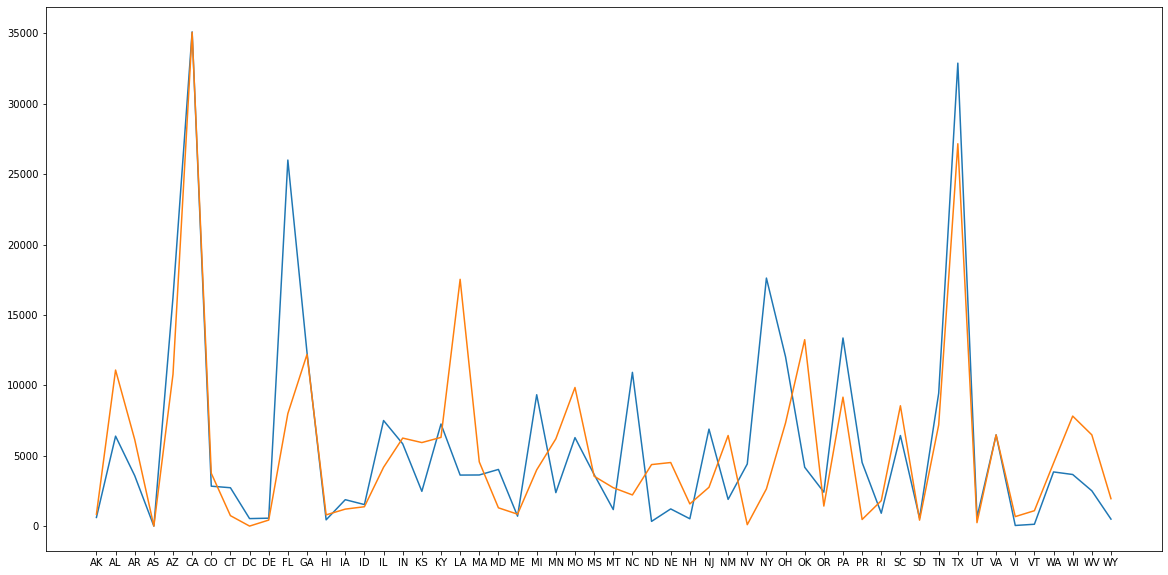

In [61]:
plt.rcParams['figure.figsize'] = (20,10)
plt.plot(muertes_staff['state'],muertes_staff['deaths_covid'])
plt.plot(muertes_staff['state'],muertes_staff['critical_staffing_shortage_today_yes'])
plt.show()

## PREGUNTA 8
Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

In [62]:
# Se genera un data frame con información histórica de las muertes para mostrar el peor mes histórico
point8 = df['date'], df['deaths_covid']
df8 = pd.DataFrame(point8)
df8 = pd.DataFrame.transpose(df8)

In [63]:
#se generan columnas auxiliares para averiguar el peor mes histórico
df8['date'] = pd.to_datetime(df8['date'])
df8['month'] = pd.DatetimeIndex(df8['date']).month
df8['year'] = pd.DatetimeIndex(df8['date']).year

In [64]:
# Se cambia el tipo de la columna 
df8['deaths_covid'] = df8['deaths_covid'].astype(float, errors = 'raise')

In [65]:
# Se elina columna para mejor visulización
df8.drop(columns=['date'], inplace=True)

In [66]:
# Se rellenan valore nulos
df8.fillna(0)

,deaths_covid,month,year
0,59.0,12,2020
1,10.0,12,2020
2,0.0,10,2020
3,0.0,10,2020
4,6.0,10,2020
...,...,...,...
47796,0.0,2,2022
47797,57.0,2,2022
47798,2.0,2,2022
47799,2.0,2,2022


In [67]:
# Se reagrupa por mes y año 
peormes = df8.groupby(['year','month']).sum()

In [68]:
# Se reinician índices
peormes.reset_index(inplace = True)

In [69]:
# Se genera una columna que concatene año y mes para obtener una nueva clave
peormes['month'] = peormes['month'].astype(str)
peormes['month'] = peormes['month'].apply(lambda x : '0' + x if len(x)<2 else x)
peormes['year'] = peormes['year'].astype(str)
peormes['year_month']=peormes['year'] + peormes['month']
peormes['year_month'] = peormes['year_month'].astype(int)

## Respuesta punto 8

Según los datos históricos el peor mes debido a la mayor cantidad de decesos (66020) en Estados Unidos fue en el mes de enero del año 2021.

In [70]:
peormes.sort_values('deaths_covid', ascending= False).head(1)

,year,month,deaths_covid,year_month
12,2021,01,66020.0,202101


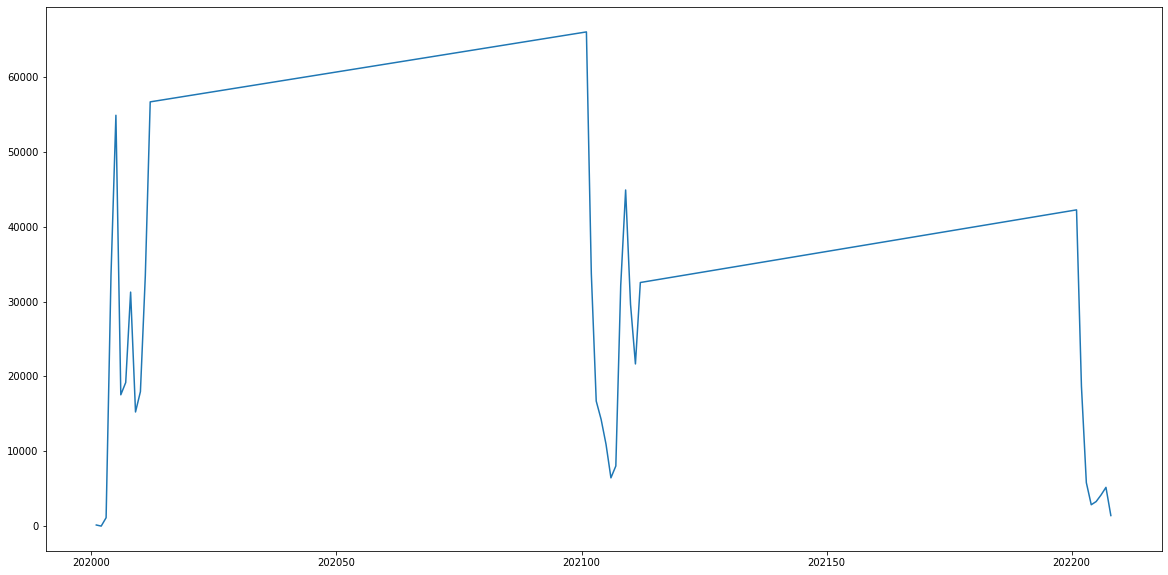

In [71]:
plt.plot(peormes['year_month'],peormes['deaths_covid'])

## PREGUNTA 9
¿Qué recomendaciones haría, ex post, con respecto a los recursos hospitalarios y su uso?

## RESPUESTA PREGUNTA 9

Se debe de cuidar mucho la falta de médicos debido a que estos afectan directamente con la mortalidad de los pacientes. Especialmente en las ciudades que tienen más cantidad de hospitalizados y muertos. 